

#Setup e inicialização



In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=4a3e4630cbb627740371c2112a1415a2e85a1846254ee4769c19b8b7cd7b8371
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
spark = (SparkSession
                     .builder
                     .master('local')
                     .appName('spotify_dataset')
                     .config('spark.ui.port', '4050')
                     .getOrCreate()
)

In [ ]:
spark

In [ ]:
from IPython.utils.sysinfo import encoding
df = (spark.read
           .format('csv')
           .option('delimiter', ',')
           .option('encoding', 'utf-8')
           .option('header', 'true')
           .option('inferschema', 'true')
           .option('encoding', 'utf-8')
           .option('escape','"')
           .load('/content/drive/MyDrive/Datasets/spotify.csv')
)

#Entendendo o dataset

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- song_name: string (nullable = true)
 |-- song_popularity: string (nullable = true)
 |-- song_duration_ms: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- key: double (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- audio_mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- audio_valence: double (nullable = true)



In [ ]:
df.show()

+---+--------------------+---------------+----------------+--------------------+--------------------+------------------+--------------------+----+-------------------+-------------------+----------+--------------------+-------+--------------+------------------+
|_c0|           song_name|song_popularity|song_duration_ms|        acousticness|        danceability|            energy|    instrumentalness| key|           liveness|           loudness|audio_mode|         speechiness|  tempo|time_signature|     audio_valence|
+---+--------------------+---------------+----------------+--------------------+--------------------+------------------+--------------------+----+-------------------+-------------------+----------+--------------------+-------+--------------+------------------+
|  0|Boulevard of Brok...|             73|          262333|0.005520000000000...|          0.496mol/L|             0.682|            2.94e-05| 8.0|             0.0589|             -4.095|         1|              0.0294

In [ ]:
#Verificar o tamanho do dataset(shape)
print(f'({df.count()},{len(df.columns)})')

(18835,16)


##Data Dicitionary

**song_popularity:** Popularidade da música (0-100) onde maior é melhor

**Acousticness:** Uma medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

**Danceability:** Descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é o mais dançável.

**Energy:** A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach pontua baixo na escala.

**Instrumentalness**: Prevê se uma faixa não contém vocais. Os sons  Ooh  e  aah  são tratados como instrumentais neste contexto. Faixas de rap ou palavras faladas são claramente "vocais". Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter nenhum conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior conforme o valor se aproxima de 1,0.

**Key:** A chave geral estimada da faixa. Os inteiros são mapeados para as notas usando a notação padrão da classe de notas. Por exemplo. 0 = C, 1 = C?/D?, 2 = D e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

**Liveness:** Detecta a presença de uma audiência na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

**Loudness:** O volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

**Audio_mode:** Modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

**Speechiness:** Detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação (por exemplo, talk show, livro de áudio, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala.

**Tempo:** O andamento geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

**Audio_valence:** Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, zangado).

#Tratamento dos Dados

In [ ]:
#verificar existência de valores nulos
df.toPandas().isna().any()

_c0                 False
song_name           False
song_popularity     False
song_duration_ms    False
acousticness        False
danceability        False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
audio_mode          False
speechiness         False
tempo               False
time_signature      False
audio_valence        True
dtype: bool

In [ ]:
#verificar quantidade de valores nulos encontrados

df.filter(F.col('audio_valence').isNull() | F.isnan(F.col('audio_valence'))).count()

1

In [ ]:
#exibibir linhas que contém valores nulos
df.filter(F.col('audio_valence').isNull() | F.isnan(F.col('audio_valence'))).show()

+----+-------------------+---------------+--------------------+------------+------------+------+----------------+-----+--------+--------+----------+-----------+-----+--------------+-------------+
| _c0|          song_name|song_popularity|    song_duration_ms|acousticness|danceability|energy|instrumentalness|  key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+----+-------------------+---------------+--------------------+------------+------------+------+----------------+-----+--------+--------+----------+-----------+-----+--------------+-------------+
|1757|Party In The U.S.A.|        nao_sei|0.8220000000000001kg|  0.519mol/L|        0.36|   0.0|              10|0.177|  -8.575|       0|     0.105|      97.42|    4|           0.7|         null|
+----+-------------------+---------------+--------------------+------------+------------+------+----------------+-----+--------+--------+----------+-----------+-----+--------------+-------------+



In [ ]:
#verificar a existência de inconsistências(como 'não_sei' em song_popularity exibido na consulta acima)
df.select([F.count(F.when(F.col(c) == 'nao_sei', c)).alias(c) for c in df.columns]).show()

# qtd de inconsistências encontradas
qtd_nao_sei = 0
for c in df.columns:
  qtd_nao_sei += df.filter(F.col(c) == 'nao_sei').count()

print(f'qtd de inconsistências encontradas: {qtd_nao_sei}')

+---+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|_c0|song_name|song_popularity|song_duration_ms|acousticness|danceability|energy|instrumentalness|key|liveness|loudness|audio_mode|speechiness|tempo|time_signature|audio_valence|
+---+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+
|  0|        0|              1|               0|           0|           0|     1|               2|  0|       4|       1|         1|          0|    1|             1|            0|
+---+---------+---------------+----------------+------------+------------+------+----------------+---+--------+--------+----------+-----------+-----+--------------+-------------+

qtd de inconsistências encontradas: 12


In [ ]:
# Criação de lista com o índice das linhas com ocorrência 'não-sei' 
nao_sei_lista = []

for c in ['song_popularity', 'energy', 'instrumentalness', 'liveness', 'loudness', 'audio_mode', 'tempo', 'time_signature']:
 n = df.select(F.col('_c0')).filter(F.col(c) == 'nao_sei').count()
 #df.select(F.col('_c0')).filter(F.col(c) == 'nao_sei').show()
 for i in range(n):
   x = df.select(F.col('_c0')).filter(F.col(c) == 'nao_sei').collect()[i][0]
   nao_sei_lista.append(x)

print(nao_sei_lista)

[1757, 72, 923, 1392, 125, 1046, 1181, 6616, 1706, 6587, 1564, 521]


In [ ]:
#exibição das linhas com ocorrência 'não-sei'
df.filter(F.col('_c0').isin(nao_sei_lista)).show()

+----+--------------------+---------------+--------------------+------------+--------------------+-------+----------------+-----+-------------------+-------------------+----------+-----------+-----------------+--------------+------------------+
| _c0|           song_name|song_popularity|    song_duration_ms|acousticness|        danceability| energy|instrumentalness|  key|           liveness|           loudness|audio_mode|speechiness|            tempo|time_signature|     audio_valence|
+----+--------------------+---------------+--------------------+------------+--------------------+-------+----------------+-----+-------------------+-------------------+----------+-----------+-----------------+--------------+------------------+
|  72|Banana Clip - Spa...|             57|              202373|     0.107kg|          0.398mol/L|nao_sei|             0.0|  1.0|              0.121|             -5.626|         0|       0.12|83.82799999999997|             4|0.7190000000000001|
| 125|Live Your Life

In [ ]:
#Dropar lista de inconsistências('nao_sei')

df = df.filter(~F.col('_c0').isin(nao_sei_lista))

df.show()

+---+--------------------+---------------+----------------+--------------------+--------------------+------------------+--------------------+----+-------------------+-------------------+----------+--------------------+-------+--------------+------------------+
|_c0|           song_name|song_popularity|song_duration_ms|        acousticness|        danceability|            energy|    instrumentalness| key|           liveness|           loudness|audio_mode|         speechiness|  tempo|time_signature|     audio_valence|
+---+--------------------+---------------+----------------+--------------------+--------------------+------------------+--------------------+----+-------------------+-------------------+----------+--------------------+-------+--------------+------------------+
|  0|Boulevard of Brok...|             73|          262333|0.005520000000000...|          0.496mol/L|             0.682|            2.94e-05| 8.0|             0.0589|             -4.095|         1|              0.0294

In [ ]:
#verificar valores duplicados
qtd_duplicados = df.count() - df.drop(F.col('_c0')).drop_duplicates().count()
print(qtd_duplicados)

3903


In [ ]:
#remoção da coluna de id
df = df.drop(F.col('_c0'))

#remover do df linhas com valores duplicados
df = df.drop_duplicates()

#novo shape do df
print(f'({df.count()},{len(df.columns)})')

(14920,15)


In [ ]:
#Avaliar valores númericos
df.summary().show()

+-------+--------------------+-----------------+--------------------+------------+------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|summary|           song_name|  song_popularity|    song_duration_ms|acousticness|danceability|             energy|   instrumentalness|               key|           liveness|           loudness|         audio_mode|        speechiness|             tempo|     time_signature|     audio_valence|
+-------+--------------------+-----------------+--------------------+------------+------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|  count|               14920|            14920|               14920|       14920|       14920|              14920|      

In [ ]:
#remover unidades de medida das colunas acousticness(kg) e danceability(mol/L) para conversão em númerico

#df.replace('kg',None,subset='acousticness').show(truncate=False)
df = df.withColumn('acousticness', F.split(F.col('acousticness'),'kg').getItem(0))\
       .withColumn('danceability', F.split(F.col('danceability'),'mol/L').getItem(0))

df.show()

+--------------------+---------------+----------------+--------------------+-------------------+------------------+--------------------+----+-------------------+--------+----------+-----------+------------------+--------------+-------------------+
|           song_name|song_popularity|song_duration_ms|        acousticness|       danceability|            energy|    instrumentalness| key|           liveness|loudness|audio_mode|speechiness|             tempo|time_signature|      audio_valence|
+--------------------+---------------+----------------+--------------------+-------------------+------------------+--------------------+----+-------------------+--------+----------+-----------+------------------+--------------+-------------------+
|           Sk8er Boi|             67|          204000|6.790000000000001...|              0.487|               0.9|                 0.0| 0.0|              0.358|  -4.417|         1|     0.0482|           149.937|             4|              0.484|
|  Whene

In [ ]:
#verificar os tipos das colunas que deveriam ser númericos e estão como string

df.printSchema()

root
 |-- song_name: string (nullable = true)
 |-- song_popularity: string (nullable = true)
 |-- song_duration_ms: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- key: double (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- audio_mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- time_signature: string (nullable = true)
 |-- audio_valence: double (nullable = true)



In [ ]:
#alterar tipagem das colunas para corresponder ao dicionário de dados

from pyspark.sql.types import *

df = df.withColumn('song_popularity',df.song_popularity.cast(IntegerType()))\
        .withColumn('song_duration_ms',df.song_duration_ms.cast(IntegerType()))\
        .withColumn('acousticness',df.acousticness.cast(DoubleType()))\
        .withColumn('danceability',df.danceability.cast(DoubleType()))\
        .withColumn('energy',df.energy.cast(DoubleType()))\
        .withColumn('instrumentalness', df.instrumentalness.cast(DoubleType()))\
        .withColumn('key', df.key.cast(DoubleType()))\
        .withColumn('liveness', df.liveness.cast(DoubleType()))\
        .withColumn('loudness', df.loudness.cast(DoubleType()))\
        .withColumn('audio_mode', df.audio_mode.cast(DoubleType()))\
        .withColumn('speechiness', df.speechiness.cast(DoubleType()))\
        .withColumn('tempo', df.tempo.cast(DoubleType()))\
        .withColumn('time_signature', df.time_signature.cast(FloatType()))\
        .withColumn('audio_valence', df.audio_valence.cast(DoubleType()))

df.show()

+--------------------+---------------+----------------+--------------------+-------------------+------------------+--------------------+----+-------------------+--------+----------+-----------+------------------+--------------+-------------------+
|           song_name|song_popularity|song_duration_ms|        acousticness|       danceability|            energy|    instrumentalness| key|           liveness|loudness|audio_mode|speechiness|             tempo|time_signature|      audio_valence|
+--------------------+---------------+----------------+--------------------+-------------------+------------------+--------------------+----+-------------------+--------+----------+-----------+------------------+--------------+-------------------+
|           Sk8er Boi|             67|          204000|6.790000000000001E-5|              0.487|               0.9|                 0.0| 0.0|              0.358|  -4.417|       1.0|     0.0482|           149.937|           4.0|              0.484|
|  Whene

In [ ]:
df.summary().show()

+-------+--------------------+-----------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|summary|           song_name|  song_popularity| song_duration_ms|      acousticness|      danceability|             energy|   instrumentalness|               key|           liveness|           loudness|         audio_mode|        speechiness|             tempo|     time_signature|     audio_valence|
+-------+--------------------+-----------------+-----------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+
|  count|               14920|            14920|            14919|             14920|         

#Análises

##AS MÚSICAS POPULARES SÃO AS MAIS DANÇANTES?

Existe correlação positiva entre popularidade e danceabilidade, entretando o valor é muito baixo (correlação = 0.056), indicando que não podemos estabelecer de forma clara um padrão entre estas variáveis. Porém podemos perceber através dos diagramas de caixa que as músicas com popularidade acima de 80 possuem melhores avaliações de danceabilidade do que o conjunto geral

In [ ]:
#Correlação entre as variáveis

df_pandas = df.toPandas()

df_pandas[['song_popularity', 'danceability']].corr()

,song_popularity,danceability
song_popularity,1.000000,0.056253
danceability,0.056253,1.000000


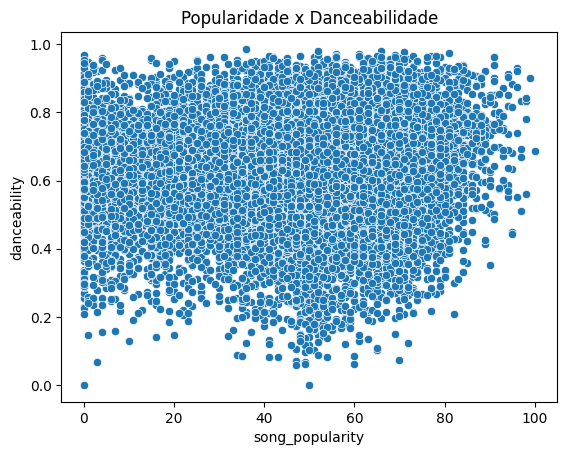

In [ ]:
#Gráfico de Dispersão
sns.scatterplot(data = df_pandas, x='song_popularity', y='danceability')
plt.title('Popularidade x Danceabilidade')
plt.show()

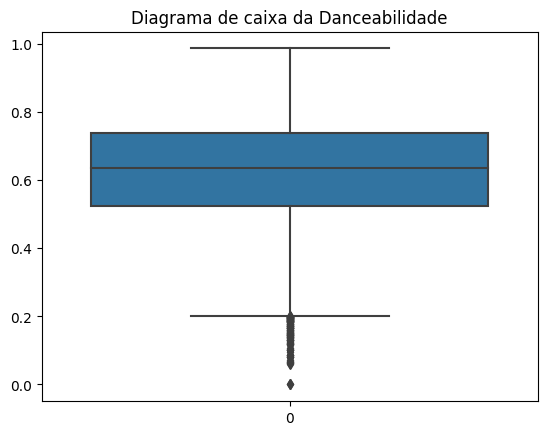

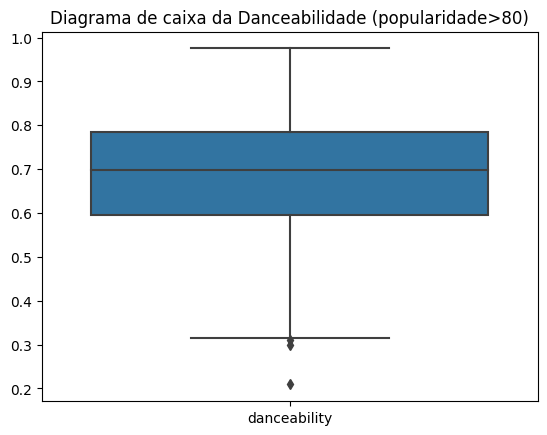

In [ ]:
sns.boxplot(data = df_pandas['danceability'])
plt.title('Diagrama de caixa da Danceabilidade')
plt.show()
sns.boxplot(data = df_pandas.loc[df_pandas.song_popularity>=80,['danceability']])
plt.title('Diagrama de caixa da Danceabilidade (popularidade>80)')
plt.show()

##AS MÚSICAS POPULARES SÃO AS COM MAIOR ENERGIA?

A correlação entre as variáveis popularidade e energia é negativa indicando que uma aumenta enquanto a outra cai, entretando por ser um valor muito próximo a zero (correlação = -0.016418) não conseguimos estabelecer um padrão claro de comportamento. Porém podemos observar que a média de energia das músicas mais populares é de 0.653890 indicando que o grau de energia ideal para uma música ser popular está mais próximo ao valor central (0,5) e distante dos extremos baixo/calmo (0) e alto/barulhento(1).

In [ ]:
#Correlação entre as variáveis
df_pandas[['song_popularity', 'energy']].corr()

,song_popularity,energy
song_popularity,1.000000,-0.016418
energy,-0.016418,1.000000


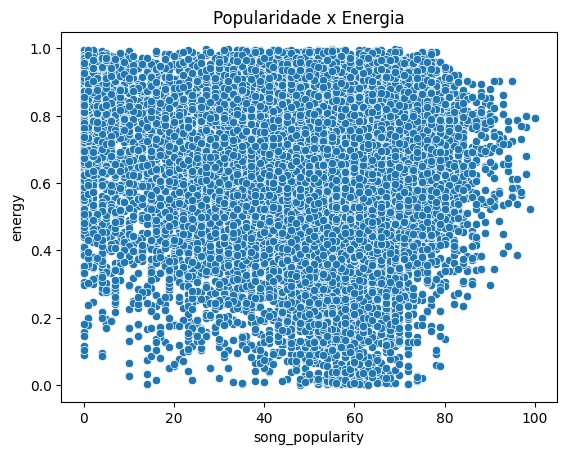

In [ ]:
#Gráfico de Dispersão
sns.scatterplot(data = df_pandas, x='song_popularity', y='energy')
plt.title('Popularidade x Energia')
plt.show()

In [ ]:
#novo df considerando somente as músicas com popularidade > 80
df_popularity_energy = df_pandas.loc[df_pandas.song_popularity>=80,['song_name','song_popularity','energy']].sort_values(by='song_popularity', ascending=False)
df_popularity_energy

,song_name,song_popularity,energy
13011,Happier,100,0.792
6603,I Love It (& Lil Pump),99,0.522
1847,Eastside (with Halsey & Khalid),98,0.680
10847,In My Feelings,98,0.626
14298,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,0.798
...,...,...,...
4835,Fireflies,80,0.649
5074,Riptide,80,0.731
10215,Dreams - 2004 Remastered Edition,80,0.492
10190,There for You,80,0.644


In [ ]:
#média popularidade e energia
df_popularity_energy.mean()

song_popularity    84.736739
energy              0.653890
dtype: float64

##AS MÚSICAS MAIS POPULARES POSSUEM MAIOR TEMPO?

A correlação entre as variáveis popularidade e tempo é negativa indicando que uma aumenta enquanto a outra cai, entretando por ser um valor muito próximo a zero (correlação = -0.029756) não conseguimos estabelecer um padrão claro de comportamento. Porém podemos observar que o fomtado do gráfico de dispersão se assemelha a uma seta (ponta) quando a popularidade ultrapassa 80, indicado uma tendência ao centro da faixa de amplitude da variável tempo.

In [ ]:
#Correlação entre as variáveis
df_pandas[['song_popularity', 'tempo']].corr()

,song_popularity,tempo
song_popularity,1.000000,-0.029756
tempo,-0.029756,1.000000


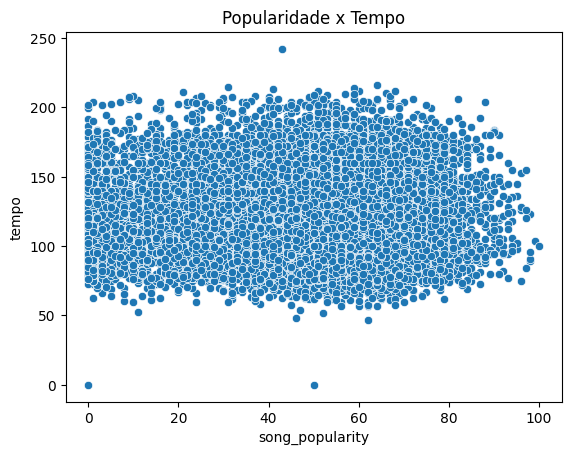

In [ ]:
#Gráfico de Dispersão
sns.scatterplot(data = df_pandas, x='song_popularity', y='tempo')
plt.title('Popularidade x Tempo')
plt.show()

##AS MÚSICAS COM INSTRUMENTALIDADE SÃO AS MAIS POPULARES?

A correlação entre as variáveis popularidade e instrumentalidade é negativa indicando que uma aumenta enquanto a outra cai, entretando por ser um valor muito próximo a zero (correlação = -0.092955) não conseguimos estabelecer um padrão claro de comportamento. O mesmo ocorre entre popularidade e vocalidade (-0.001997).

Olhando para as médias de popularidades das músicas considerando a presença ou não de vocais temos:

Músicas Instrumentais: 43.3338

Músicas com poucos vocais: 48.8000

Músicas com muitas palavras (como Rap): 48.2169

Faixas exclusivamente vocais (como podcasts): 38.0625

In [ ]:
#Correlação entre as variáveis
df_pandas[['song_popularity', 'instrumentalness']].corr()

,song_popularity,instrumentalness
song_popularity,1.000000,-0.092955
instrumentalness,-0.092955,1.000000


In [ ]:
#Correlação entre as variáveis
df_pandas[['song_popularity', 'speechiness']].corr()

,song_popularity,speechiness
song_popularity,1.000000,-0.001997
speechiness,-0.001997,1.000000


In [ ]:
#novo df considerando somente músicas instrumentais (instrumentalness > 0.5)
df_popularity_instrumentalness = df_pandas.loc[df_pandas.instrumentalness>0.5,['song_name','instrumentalness','song_popularity']].sort_values(by='instrumentalness', ascending=False)
df_popularity_instrumentalness

,song_name,instrumentalness,song_popularity
8404,savepoint,0.997,53
14566,Sandstorm - Radio Edit,0.989,50
13014,Slowing Down Magic,0.982,38
7338,Answer,0.979,33
7934,Fragments Café,0.978,55
...,...,...,...
3910,Flirt in Space,0.505,23
3789,Need You Tonight,0.504,51
13256,Shake Baby Shake,0.503,23
11581,Let It All Blow - Special Disco Remix,0.503,0


In [ ]:
#média de popularidade das músicas instrumentais
df_popularity_instrumentalness.song_popularity.mean()

43.33382030679328

In [ ]:
#novo df considerando somente faixas inteirmanete faladas tipo podcasts, talk shows, entre outros (speechiness > 0.66)
df_popularity_speechiness_all = df_pandas.loc[df_pandas.speechiness>0.66,['song_name','speechiness','song_popularity']].sort_values(by='speechiness', ascending=False)
df_popularity_speechiness_all

,song_name,speechiness,song_popularity
6540,Space Program,0.941,0
837,Racism And Injustice,0.940,21
6054,Parents' Divorce - Live,0.936,13
9166,blame,0.915,36
1233,high.flying.,0.906,47
464,Oprah 75th Golden Globes Cecil B. DeMille Awar...,0.894,24
7037,Tom's Diner,0.891,46
12406,Blk/ Wooomen/ chant,0.891,16
9726,Thrive,0.890,45
5640,Warm Water - Snakehips Remix,0.869,60


In [ ]:
#média de popularidade das músicas inteiramente faladas
df_popularity_speechiness_all.song_popularity.mean()

38.0625

In [ ]:
#novo df considerando somente faixas mistas entre instrumento e fala, como o rap (speechiness > 0.33 & speechiness < 0.66)
df_popularity_speechiness = df_pandas.loc[(df_pandas.speechiness>0.33) & (df_pandas.speechiness<0.66),['song_name','speechiness','song_popularity']].sort_values(by='speechiness', ascending=False)
df_popularity_speechiness

,song_name,speechiness,song_popularity
14583,Bag,0.653,27
8891,Village,0.652,51
13381,Daffodils,0.649,54
14768,"Final Speech - April 3, 1968",0.641,20
8202,Wake Up (RIOT VIP),0.626,52
...,...,...,...
11007,"BIG BANK (feat. 2 Chainz, Big Sean, Nicki Minaj)",0.331,88
12889,Miss My Woe (feat. Rico Love),0.331,59
3683,Other Man (feat. AJ Tracey & Sloan Evans),0.331,51
14884,FA REAL,0.331,46


In [ ]:
#média de popularidade das músicas mistas entre instrumento e fala
df_popularity_speechiness.song_popularity.mean()

48.21696801112657

In [ ]:
df_pandas.loc[df_pandas.speechiness<0.33,['song_popularity']].mean()

song_popularity    48.800099
dtype: float64